In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2]:
# Replace 'folder_path' with the actual path to your folder
folder_path = 'F:\FYP\BRATS_dataset\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData'

# Get a list of all subfolder names in the folder
subfolder_names = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# Print the list of subfolder names
print(subfolder_names)


['BraTS-GLI-00000-000', 'BraTS-GLI-00002-000', 'BraTS-GLI-00003-000', 'BraTS-GLI-00005-000', 'BraTS-GLI-00006-000', 'BraTS-GLI-00008-000', 'BraTS-GLI-00008-001', 'BraTS-GLI-00009-000', 'BraTS-GLI-00009-001', 'BraTS-GLI-00011-000', 'BraTS-GLI-00012-000', 'BraTS-GLI-00014-000', 'BraTS-GLI-00014-001', 'BraTS-GLI-00016-000', 'BraTS-GLI-00016-001', 'BraTS-GLI-00017-000', 'BraTS-GLI-00017-001', 'BraTS-GLI-00018-000', 'BraTS-GLI-00019-000', 'BraTS-GLI-00020-000', 'BraTS-GLI-00020-001', 'BraTS-GLI-00021-000', 'BraTS-GLI-00021-001', 'BraTS-GLI-00022-000', 'BraTS-GLI-00022-001', 'BraTS-GLI-00024-000', 'BraTS-GLI-00024-001', 'BraTS-GLI-00025-000', 'BraTS-GLI-00026-000', 'BraTS-GLI-00028-000', 'BraTS-GLI-00030-000', 'BraTS-GLI-00031-000', 'BraTS-GLI-00031-001', 'BraTS-GLI-00032-000', 'BraTS-GLI-00032-001', 'BraTS-GLI-00033-000', 'BraTS-GLI-00035-000', 'BraTS-GLI-00036-000', 'BraTS-GLI-00036-001', 'BraTS-GLI-00043-000', 'BraTS-GLI-00044-000', 'BraTS-GLI-00045-000', 'BraTS-GLI-00045-001', 'BraTS-GLI

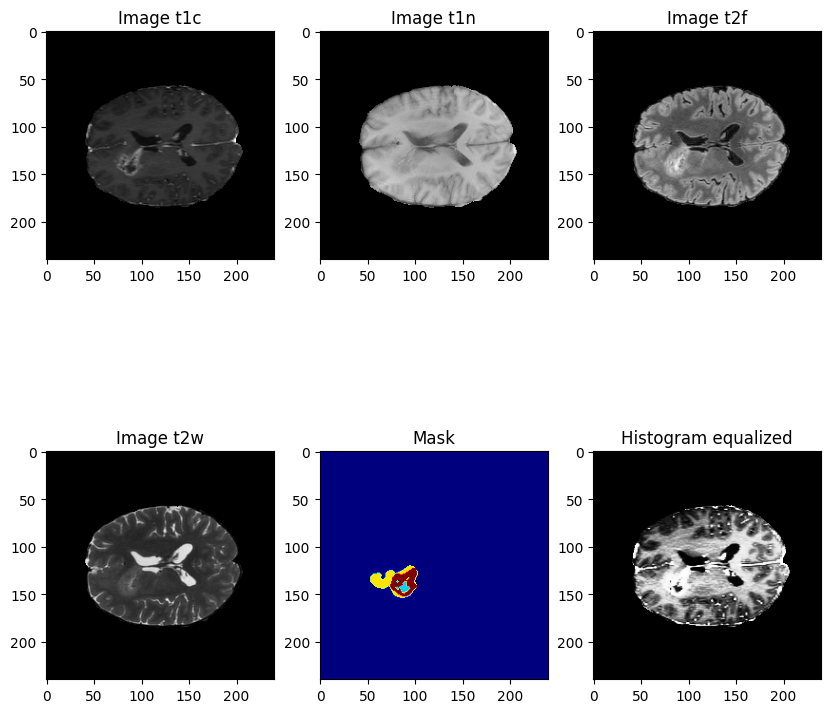

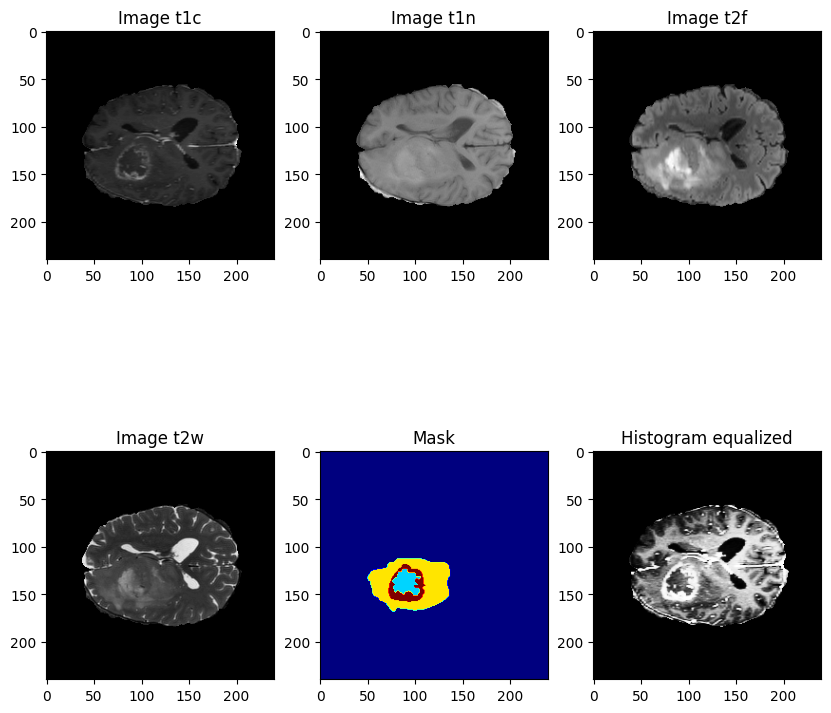

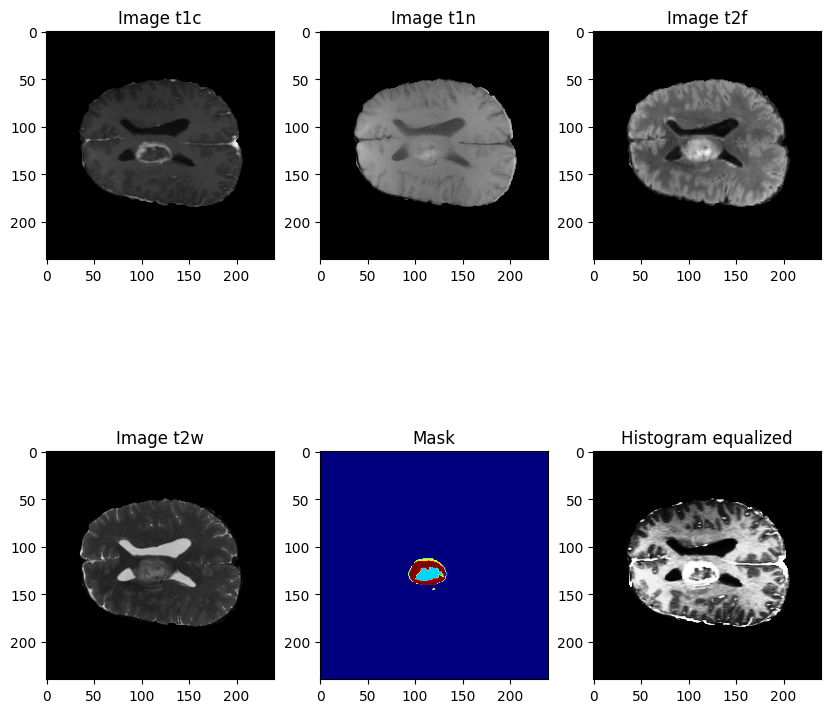

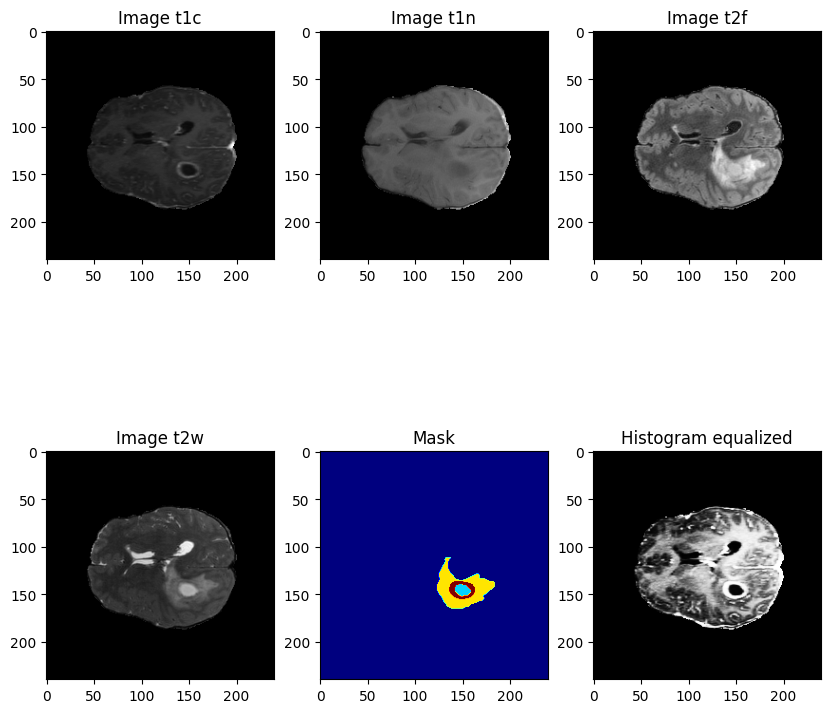

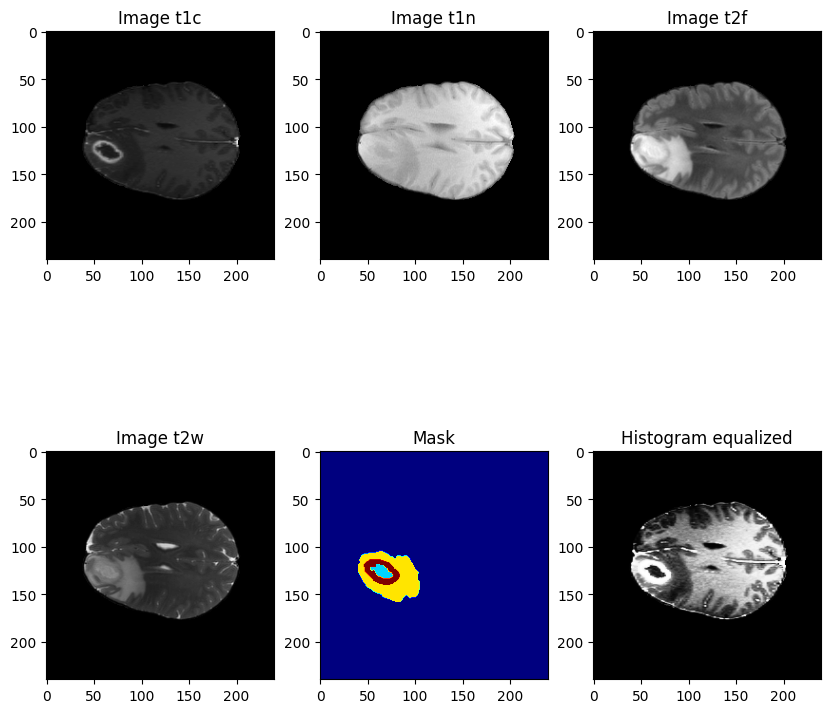

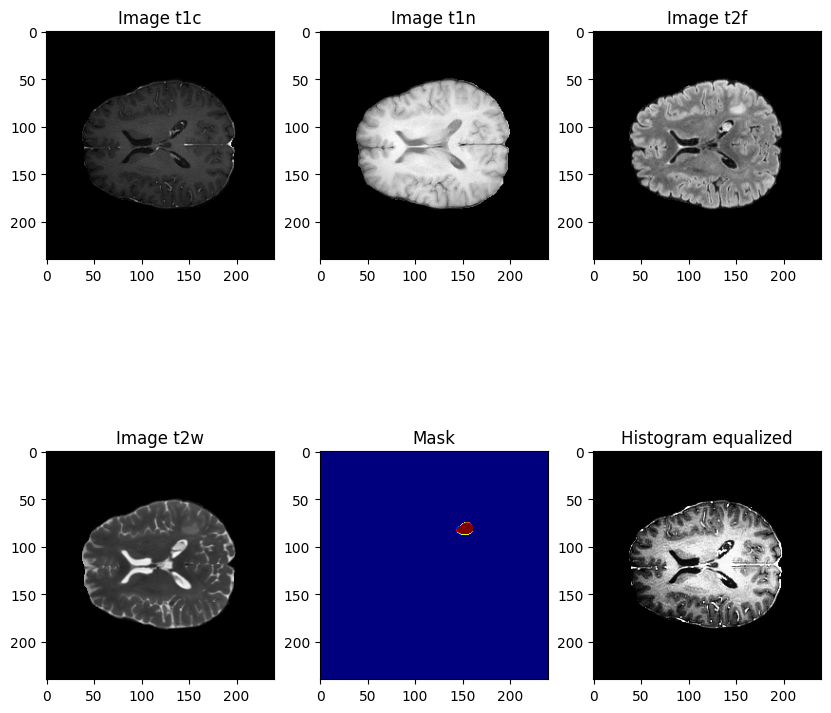

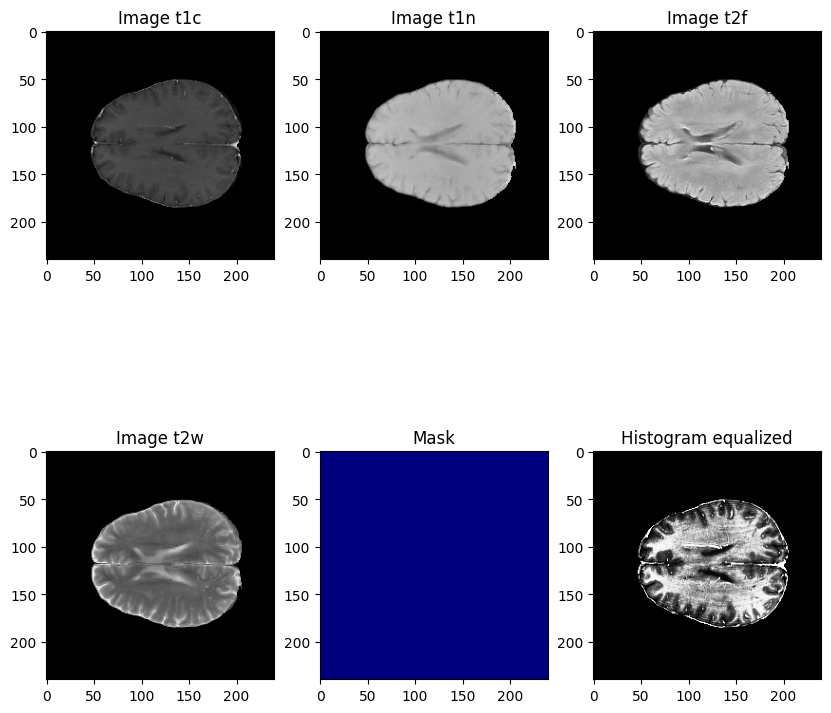

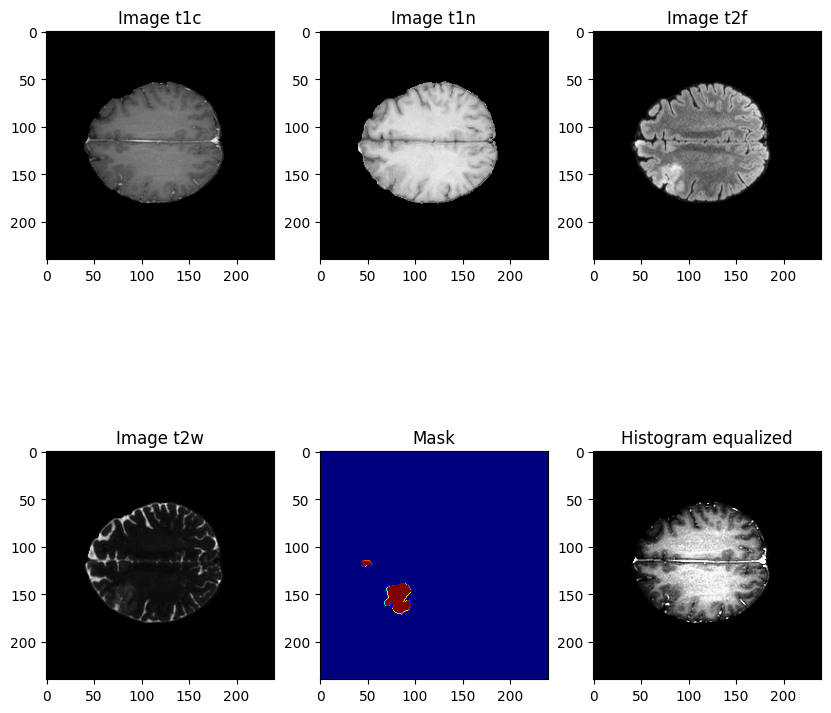

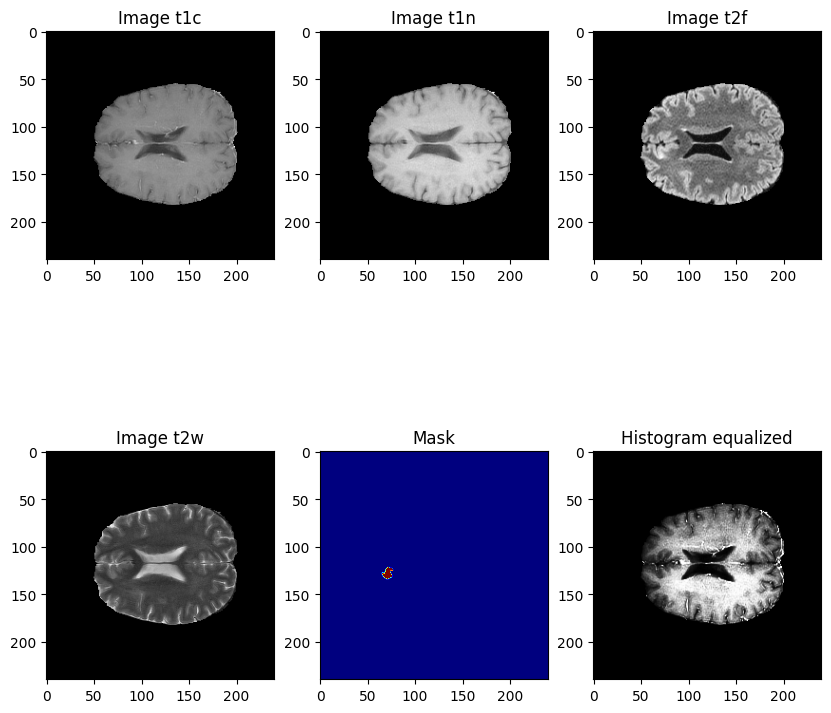

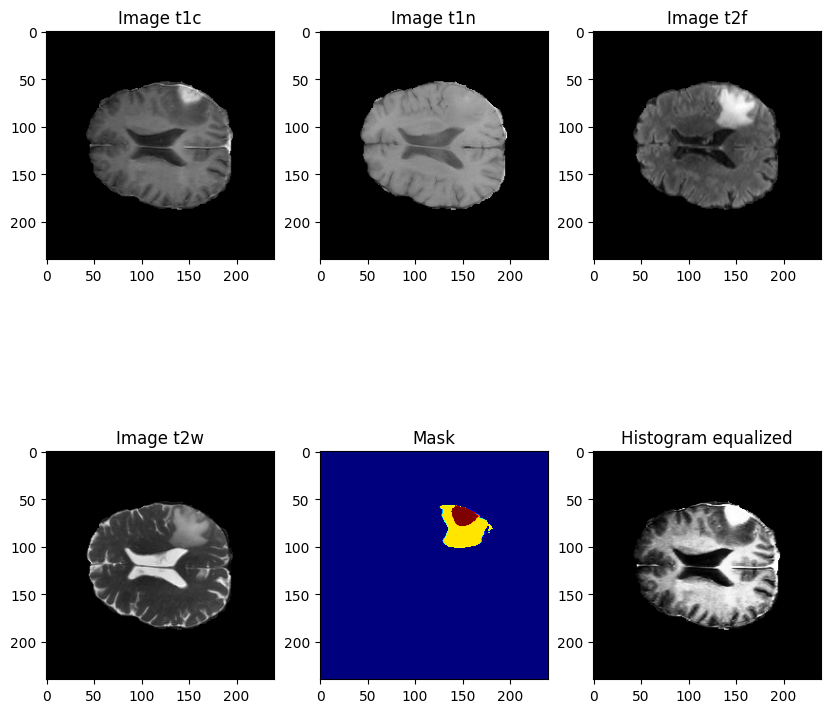

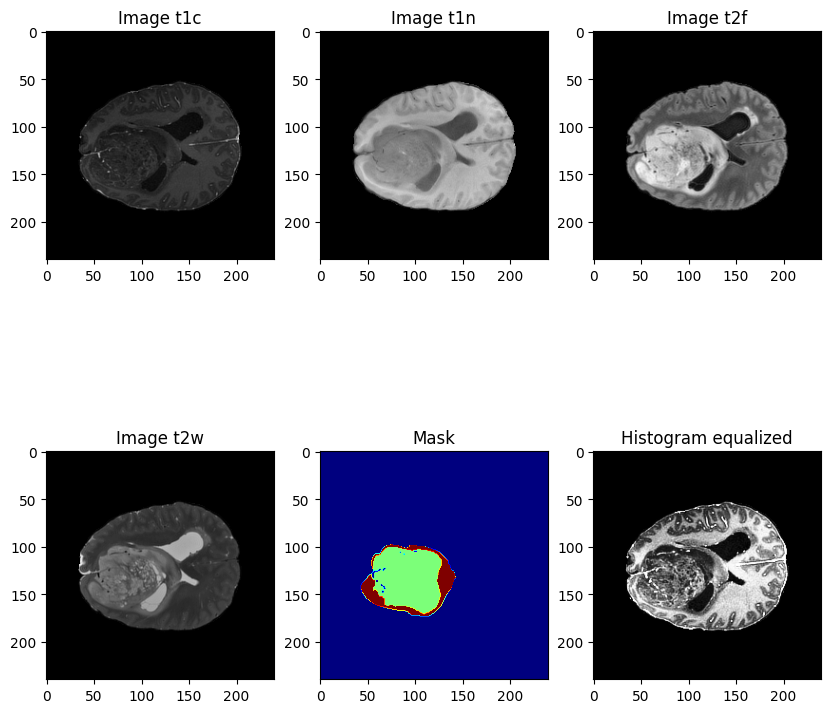

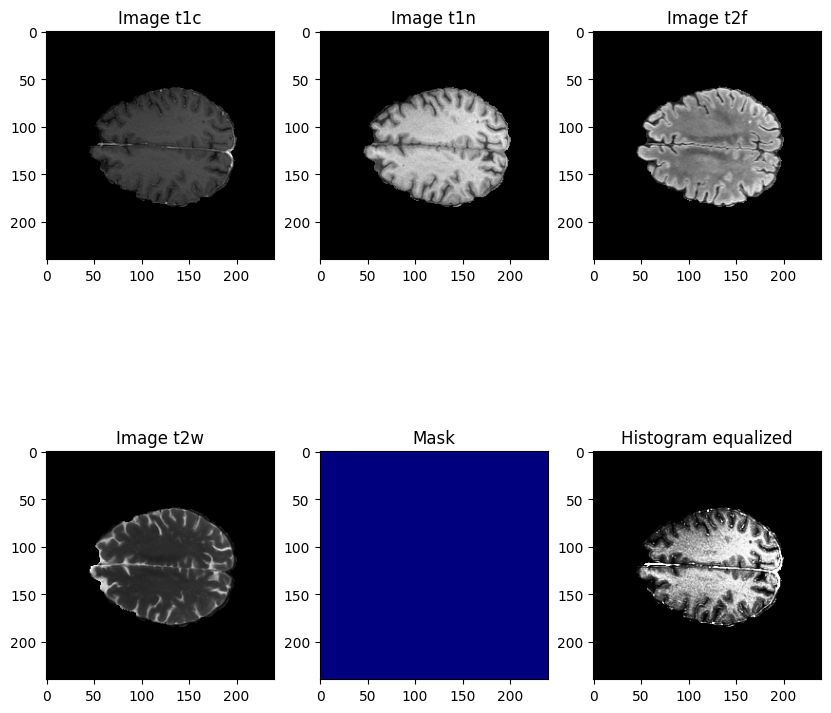

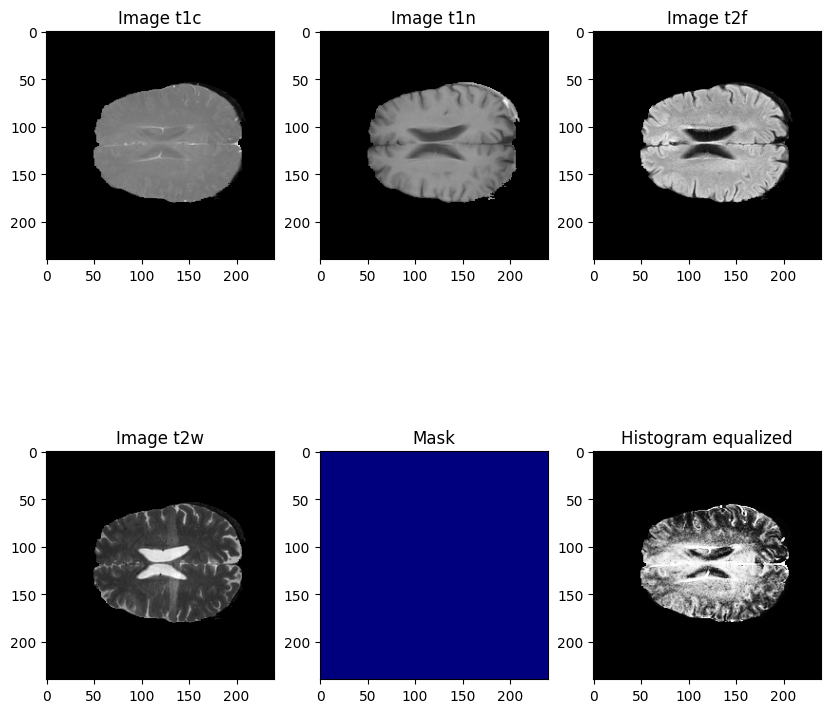

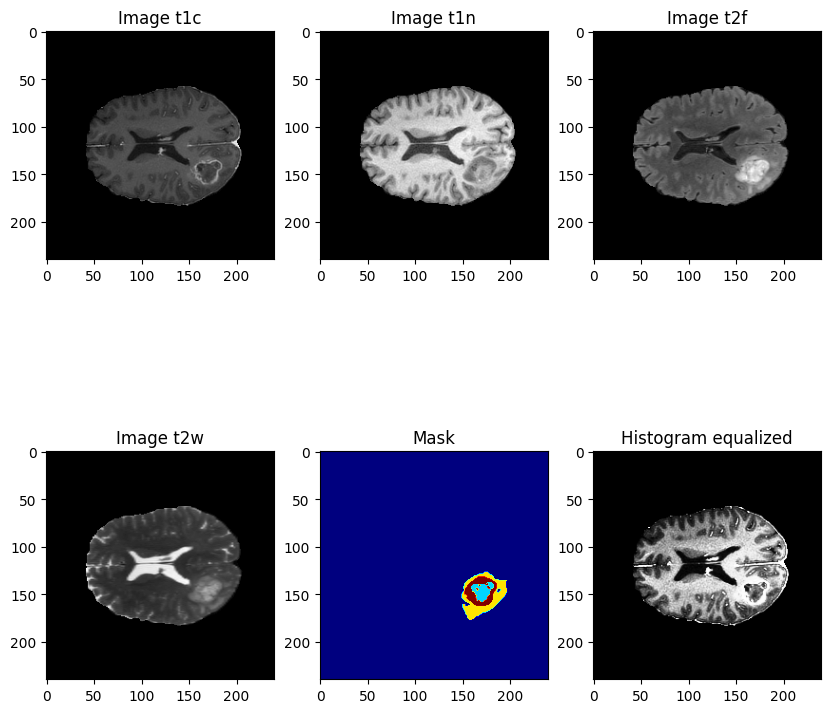

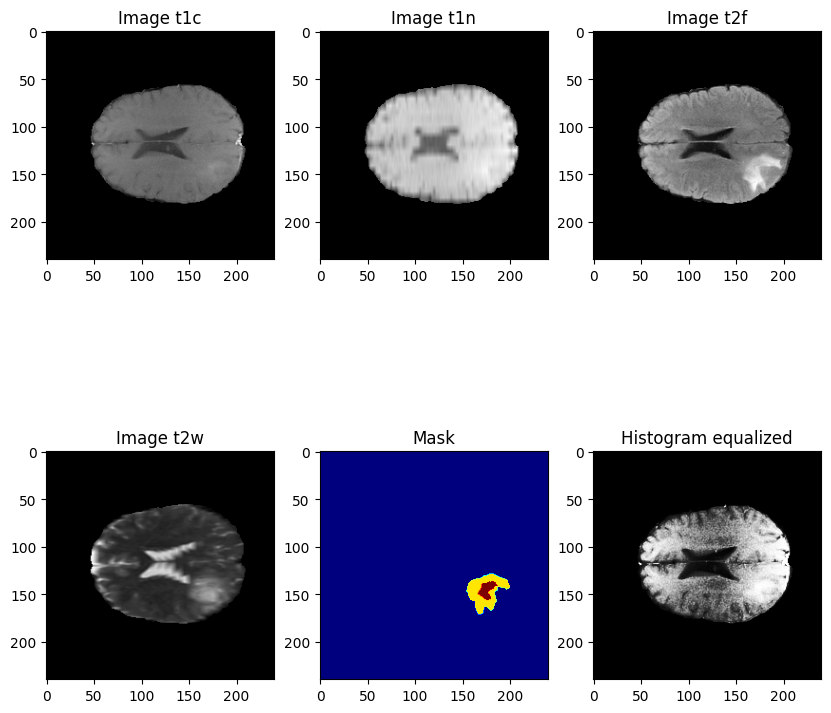

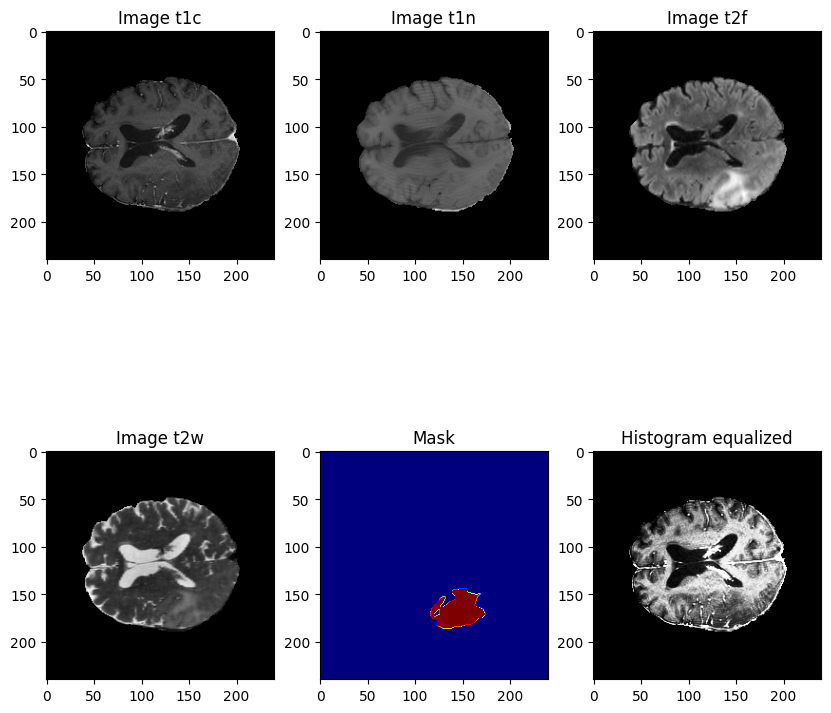

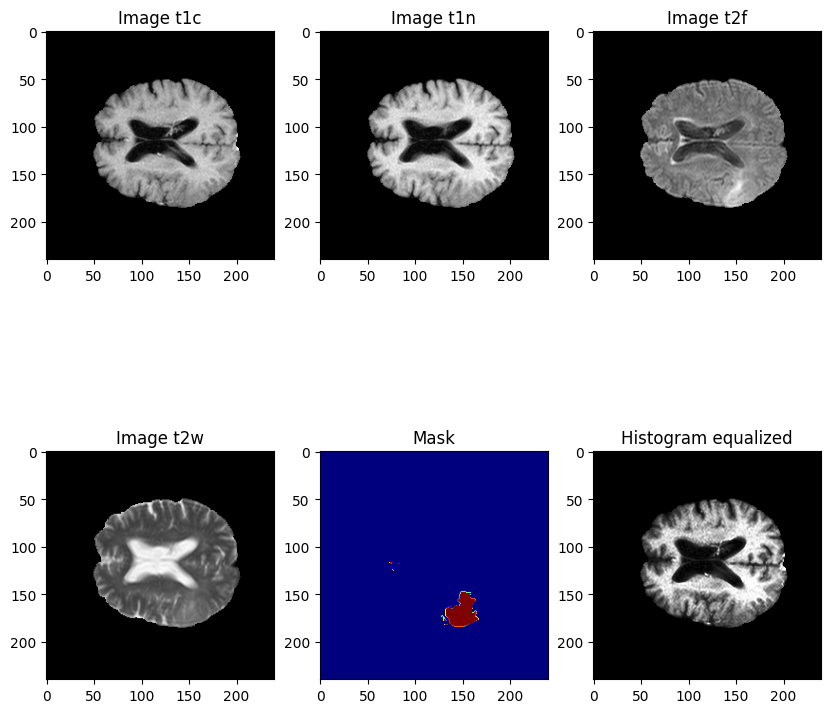

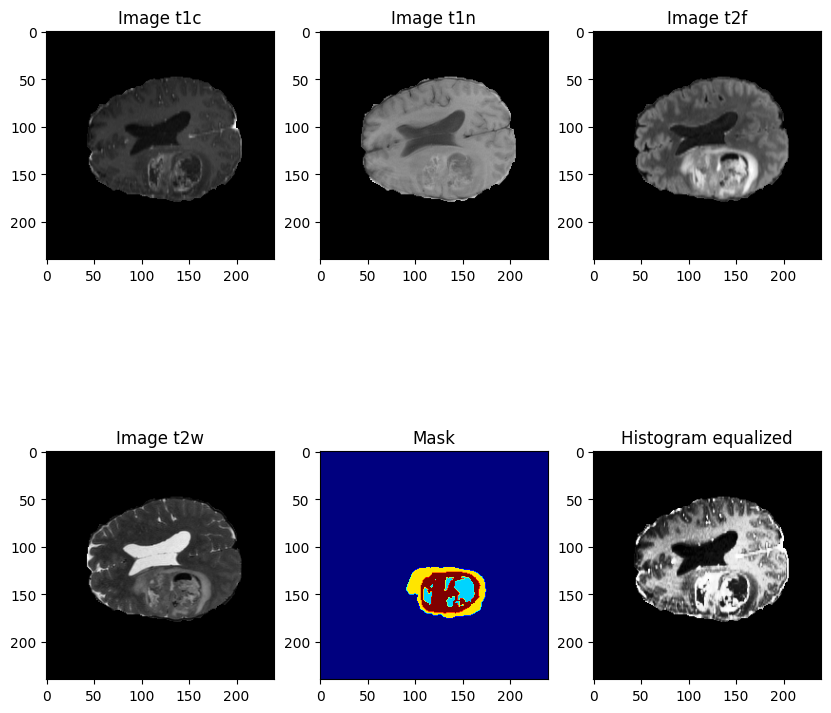

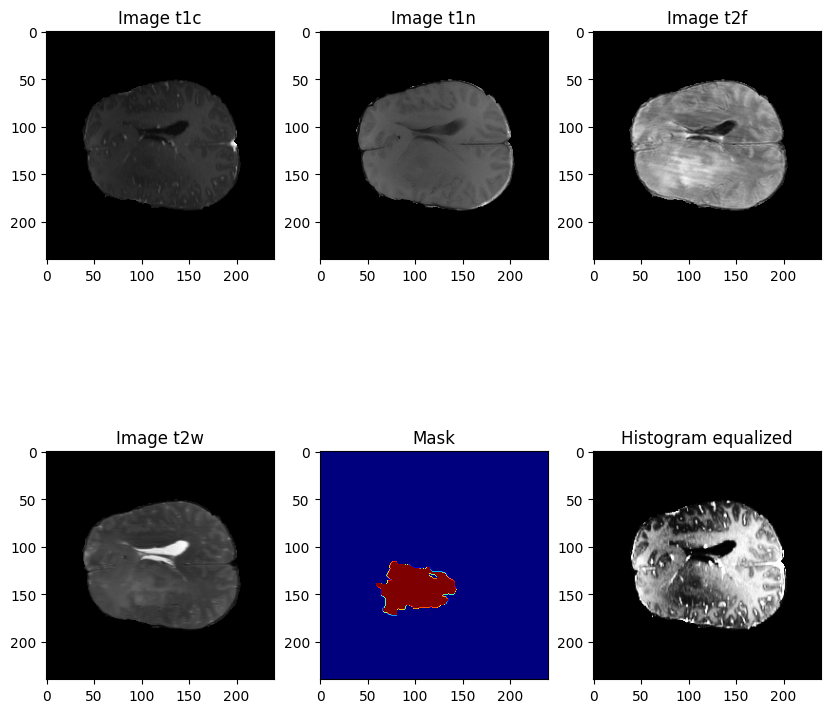

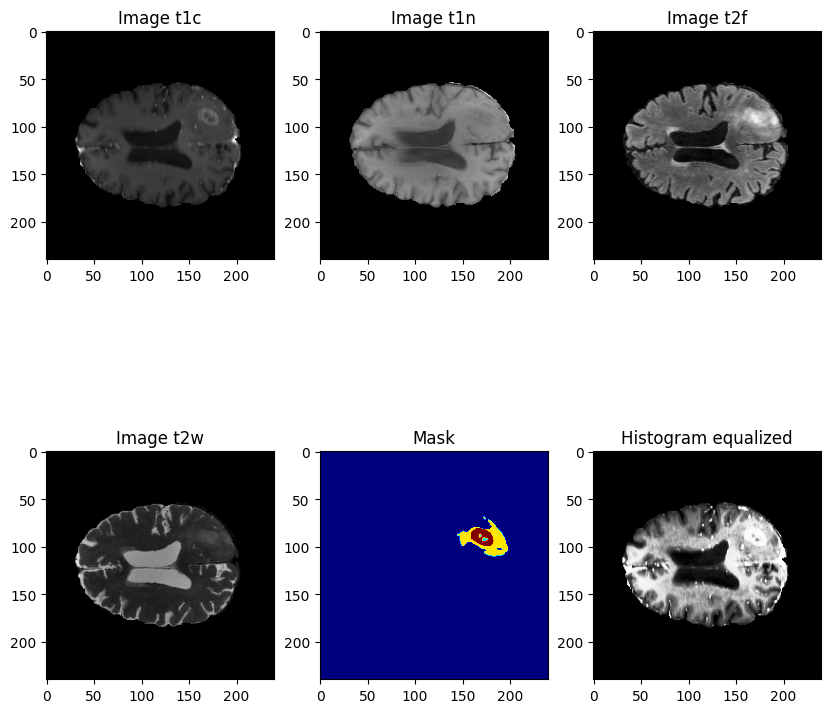

In [4]:
import cv2
from sklearn.preprocessing import LabelEncoder

for index,folder in enumerate(subfolder_names):
    parent_path = f'F:\FYP\BRATS_dataset\ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData\{folder}'
    if index < 20:
        slice_number = 86
        test_image_seg= nib.load(f"{parent_path}/{folder}-seg.nii.gz").get_fdata()
        test_image_seg = test_image_seg.astype(np.int8)
        # test_image_seg= scaler.fit_transform(test_image_seg.reshape(-1, test_image_seg.shape[-1])).reshape(test_image_seg.shape) #convert to a range of [0,1]
        test_image_seg = test_image_seg[:,:,slice_number] #86 is the slice taken
        
        # labelencoder = LabelEncoder()
        # train_masks_reshaped = test_image_seg.reshape(-1,1)
        # train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
        # test_image_seg = train_masks_reshaped_encoded.reshape(240,240)
        

        test_image_t1c=nib.load(f"{parent_path}/{folder}-t1c.nii.gz").get_fdata()
        test_image_t1c=scaler.fit_transform(test_image_t1c.reshape(-1, test_image_t1c.shape[-1])).reshape(test_image_t1c.shape)
        test_image_t1c = test_image_t1c[:,:,slice_number]
        hist = test_image_t1c*255
        hist = hist.astype(np.uint8)
        hist = cv.equalizeHist(hist)


        test_image_t1n=nib.load(f"{parent_path}/{folder}-t1n.nii.gz").get_fdata()
        test_image_t1n=scaler.fit_transform(test_image_t1n.reshape(-1, test_image_t1n.shape[-1])).reshape(test_image_t1n.shape)
        test_image_t1n = test_image_t1n[:,:,slice_number]

        test_image_t2f=nib.load(f"{parent_path}/{folder}-t2f.nii.gz").get_fdata()
        test_image_t2f=scaler.fit_transform(test_image_t2f.reshape(-1, test_image_t2f.shape[-1])).reshape(test_image_t2f.shape)
        test_image_t2f = test_image_t2f[:,:,slice_number]

        test_image_t2w=nib.load(f"{parent_path}/{folder}-t2w.nii.gz").get_fdata()
        test_image_t2w=scaler.fit_transform(test_image_t2w.reshape(-1, test_image_t2w.shape[-1])).reshape(test_image_t2w.shape)
        test_image_t2w = test_image_t2w[:,:,slice_number]

        combined_x = np.stack([test_image_t1c,test_image_t1n, test_image_t2f,test_image_t2w], axis=-1) #better to crop these . Also can use more channels

        # np.save("validation_x_data/" + folder+ '_x.npy', combined_x)
        # np.save("validation_y_data/" + folder+ '_y.npy', test_image_seg)
        fig = plt.figure(figsize=(10,10))
        plt.subplot(231)
        plt.imshow(test_image_t1c, cmap='gray')
        plt.title('Image t1c')
        plt.subplot(232)
        plt.imshow(test_image_t1n, cmap='gray')
        plt.title('Image t1n')
        plt.subplot(233)
        plt.imshow(test_image_t2f, cmap='gray')
        plt.title('Image t2f')
        plt.subplot(234)
        plt.imshow(test_image_t2w, cmap='gray')
        plt.title('Image t2w')
        plt.subplot(235)
        plt.imshow(test_image_seg,cmap = "jet")
        plt.title('Mask')
        plt.subplot(236)
        plt.imshow(hist,cmap = "gray")
        plt.title('Histogram equalized')
        # plt.subplot(236)
        # plt.imshow(combined_x)
        # plt.title('Combined')
        # plt.show()
        # plt.imshow(test_image_seg)
        # plt.title('Labels')
        # plt.show()
        # break
        # print(index)
        # if index >= 0:
        #     break

In [ ]:
combined_x = np.stack([test_image_t1c,test_image_t1n, test_image_t2f, test_image_t2w], axis=3) #better to crop these . Also can use more channels

In [ ]:
test_label = 